In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
import pandas as pd
import numpy as np
#1. Reading & displaying the data 
import pandas as pd
df = pd.read_csv('data2.csv', delimiter = ',')
display(df)

,0,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores
0,1,20.84,51.96,45.72,45.53,34.60
1,2,22.39,54.07,55.71,41.56,44.16
2,3,23.75,57.80,42.42,65.82,49.34
3,4,9.70,45.27,44.58,58.71,40.88
4,5,11.85,44.53,46.97,40.71,47.39
...,...,...,...,...,...,...
95,96,13.79,41.46,38.77,59.79,41.17
96,97,24.53,55.03,45.86,50.61,31.78
97,98,31.30,56.55,49.66,58.17,45.59
98,99,20.70,39.71,38.69,47.48,39.68


In [10]:
## WE WILL assighn each 5 people in a team randomly,

num_teams = 20
num_people_per_team = 5
team_numbers = np.random.randint(1, num_teams + 1, size=len(df))
df['Team number'] = team_numbers

# Print the first few rows to check the result
print(df.head())

   0  neuroticism_scores  extroversion_scores  openness_scores   
0  1               20.84                51.96            45.72  \
1  2               22.39                54.07            55.71   
2  3               23.75                57.80            42.42   
3  4                9.70                45.27            44.58   
4  5               11.85                44.53            46.97   

   agreeableness_scores  conscientiousness_scores  Team number  
0                 45.53                     34.60            3  
1                 41.56                     44.16            2  
2                 65.82                     49.34            1  
3                 58.71                     40.88           15  
4                 40.71                     47.39            5  


In [11]:
df = df.drop(df.columns[0], axis=1)
display(df.head(5))
display(df.info())
df["Team number"]

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number
0,20.84,51.96,45.72,45.53,34.60,3
1,22.39,54.07,55.71,41.56,44.16,2
2,23.75,57.80,42.42,65.82,49.34,1
3,9.70,45.27,44.58,58.71,40.88,15
4,11.85,44.53,46.97,40.71,47.39,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   neuroticism_scores        100 non-null    float64
 1   extroversion_scores       100 non-null    float64
 2   openness_scores           100 non-null    float64
 3   agreeableness_scores      100 non-null    float64
 4   conscientiousness_scores  100 non-null    float64
 5   Team number               100 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 4.4 KB


None

0      3
1      2
2      1
3     15
4      5
      ..
95    14
96     6
97    14
98    11
99    19
Name: Team number, Length: 100, dtype: int32

In [5]:
For creatin team score 

SyntaxError: invalid syntax (2691502035.py, line 1)

In [12]:
target_average = 70  # You can specify the desired average score

# Function to generate team scores with the desired average
def generate_team_score(target_average, team_size):
    total = target_average * team_size
    min_score = max(0, total - 100 * (team_size - 1))
    max_score = min(100, total)
    return random.randint(min_score, max_score)

# Create a new column with team scores
team_scores = {}
for team_number, team_data in df.groupby('Team number'):
    team_size = len(team_data)
    team_scores[team_number] = generate_team_score(target_average, team_size)

df['Team Score'] = df['Team number'].map(team_scores)

In [6]:
df


,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number
0,20.84,51.96,45.72,45.53,34.60,9
1,22.39,54.07,55.71,41.56,44.16,3
2,23.75,57.80,42.42,65.82,49.34,17
3,9.70,45.27,44.58,58.71,40.88,7
4,11.85,44.53,46.97,40.71,47.39,19
...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,3
96,24.53,55.03,45.86,50.61,31.78,1
97,31.30,56.55,49.66,58.17,45.59,11
98,20.70,39.71,38.69,47.48,39.68,17


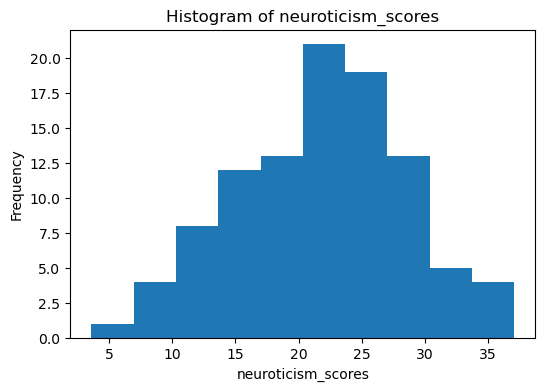

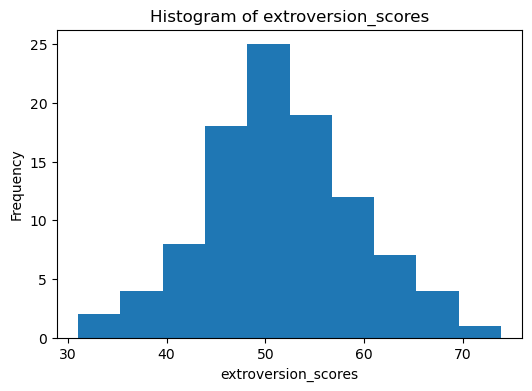

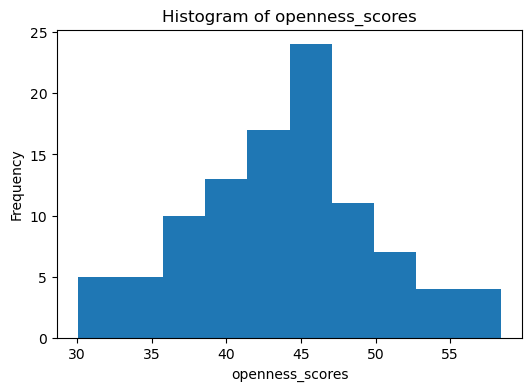

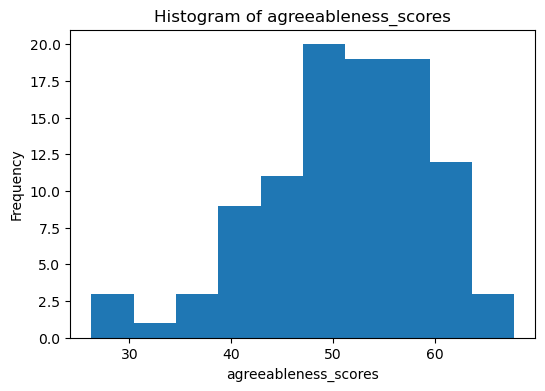

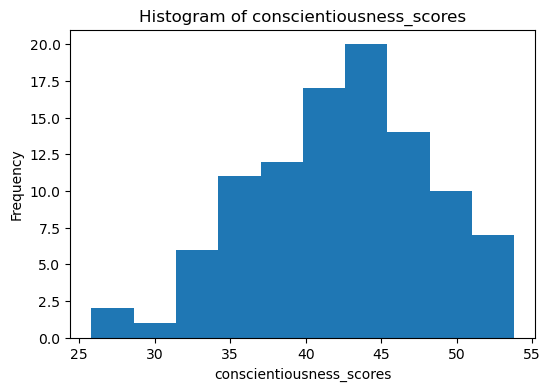

In [13]:

numerical_cols = df.select_dtypes(include=['number']).drop(columns={'Team number',"Team Score"}).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Visualize statistics for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].plot(kind='hist', title=f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize statistics for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', title=f'Bar plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()






In [14]:
# Calculate mean and standard deviation for each BIG 5 score
mean_neuroticism = df['neuroticism_scores'].mean()
std_neuroticism = df['neuroticism_scores'].std()

mean_extroversion = df['extroversion_scores'].mean()
std_extroversion = df['extroversion_scores'].std()

mean_openness = df['openness_scores'].mean()
std_openness = df['openness_scores'].std()

mean_agreeableness = df['agreeableness_scores'].mean()
std_agreeableness = df['agreeableness_scores'].std()

mean_conscientiousness = df['conscientiousness_scores'].mean()
std_conscientiousness = df['conscientiousness_scores'].std()

# Print the statistics
print(f"Neuroticism - Mean: {mean_neuroticism}, Std Dev: {std_neuroticism}")
print(f"Extroversion - Mean: {mean_extroversion}, Std Dev: {std_extroversion}")
print(f"Openness - Mean: {mean_openness}, Std Dev: {std_openness}")
print(f"Agreeableness - Mean: {mean_agreeableness}, Std Dev: {std_agreeableness}")
print(f"Conscientiousness - Mean: {mean_conscientiousness}, Std Dev: {std_conscientiousness}")


Neuroticism - Mean: 21.74470000000001, Std Dev: 6.891302152977794
Extroversion - Mean: 51.44660000000001, Std Dev: 7.865300500273079
Openness - Mean: 43.85029999999999, Std Dev: 6.024461995343097
Agreeableness - Mean: 51.11589999999999, Std Dev: 8.316578926481972
Conscientiousness - Mean: 42.317800000000005, Std Dev: 5.839734423877009


C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

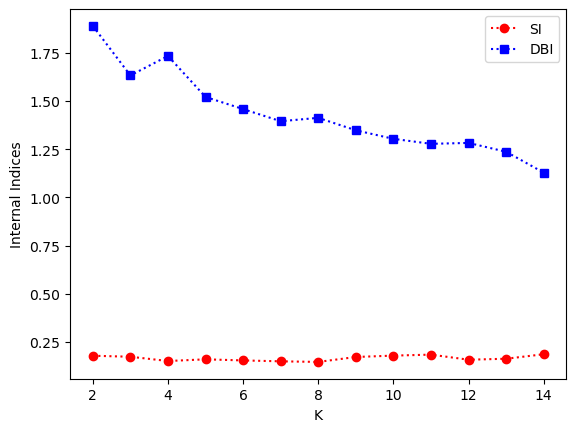

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Set possible values for K
k_vals=range(2,15)

# Empty arrays for internal measures
sShil_max = np.empty([len(k_vals),1])
sDaBo_min = np.empty_like(sShil_max)

for i,n in enumerate(k_vals):
    kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(df[numerical_cols])
    sShil_max[i] = metrics.silhouette_score(df[numerical_cols],kmeans.labels_)
    sDaBo_min[i] = metrics.davies_bouldin_score(df[numerical_cols],kmeans.labels_) 
    
plt.plot(k_vals, sShil_max, 'o:',c='r')
plt.plot(k_vals, sDaBo_min, 's:',c='b')
plt.xlabel("K")
plt.ylabel("Internal Indices")
plt.legend(['SI','DBI'])
plt.show()

C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaffe\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


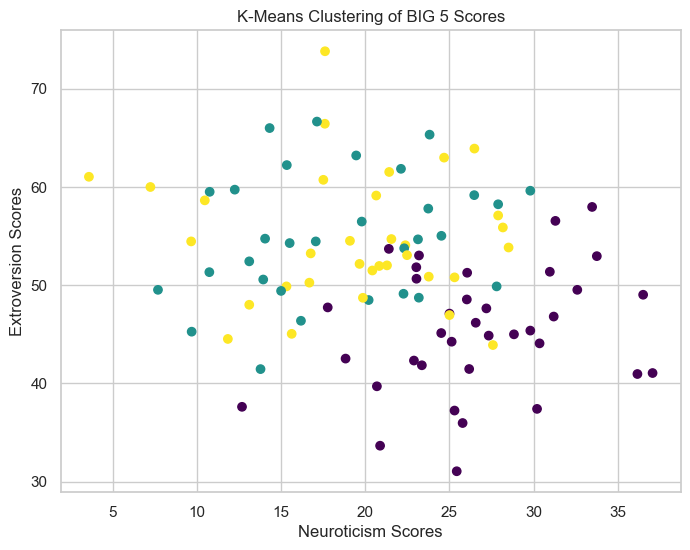

    neuroticism_scores  extroversion_scores  openness_scores   
0                20.84                51.96            45.72  \
1                22.39                54.07            55.71   
2                23.75                57.80            42.42   
3                 9.70                45.27            44.58   
4                11.85                44.53            46.97   
..                 ...                  ...              ...   
95               13.79                41.46            38.77   
96               24.53                55.03            45.86   
97               31.30                56.55            49.66   
98               20.70                39.71            38.69   
99               21.30                52.02            50.26   

    agreeableness_scores  conscientiousness_scores  Team number  Team Score   
0                  45.53                     34.60            3          85  \
1                  41.56                     44.16            2          

In [25]:


# Specify the number of clusters (k=3)
kmeans = KMeans(n_clusters=3,random_state=100)

# Fit the k-means model to the BIG 5 scores
kmeans.fit(df[['neuroticism_scores', 'extroversion_scores', 'openness_scores', 'agreeableness_scores', 'conscientiousness_scores']])

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['neuroticism_scores'], df['extroversion_scores'], c=df['cluster'], cmap='viridis')
plt.xlabel('Neuroticism Scores')
plt.ylabel('Extroversion Scores')
plt.title('K-Means Clustering of BIG 5 Scores')
plt.show()

# Display the DataFrame with cluster labels
print(df)

In [26]:
df

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score,cluster
0,20.84,51.96,45.72,45.53,34.60,3,85,2
1,22.39,54.07,55.71,41.56,44.16,2,61,2
2,23.75,57.80,42.42,65.82,49.34,1,69,1
3,9.70,45.27,44.58,58.71,40.88,15,29,1
4,11.85,44.53,46.97,40.71,47.39,5,42,2
...,...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,14,86,1
96,24.53,55.03,45.86,50.61,31.78,6,3,1
97,31.30,56.55,49.66,58.17,45.59,14,86,0
98,20.70,39.71,38.69,47.48,39.68,11,73,0


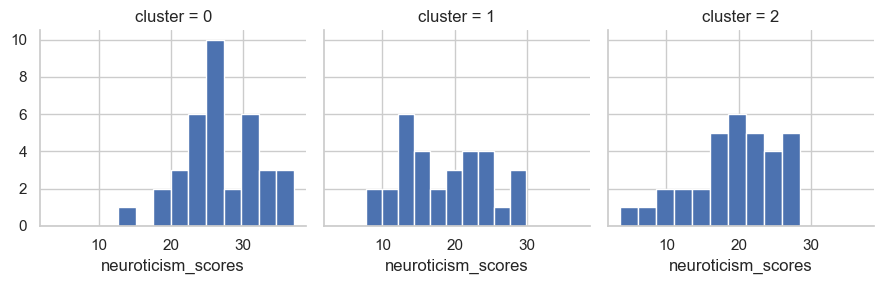

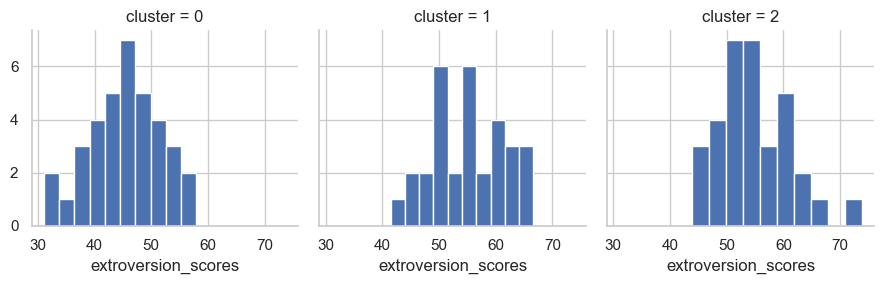

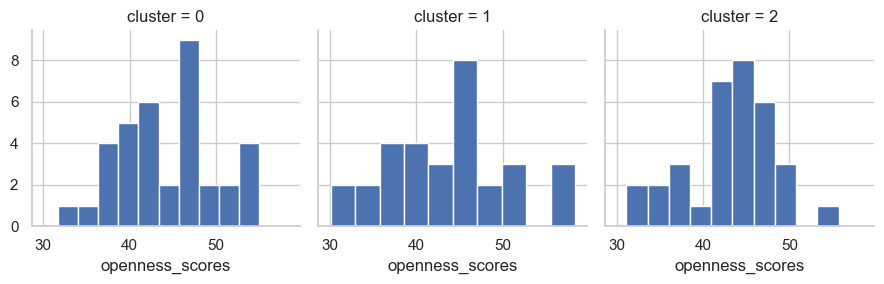

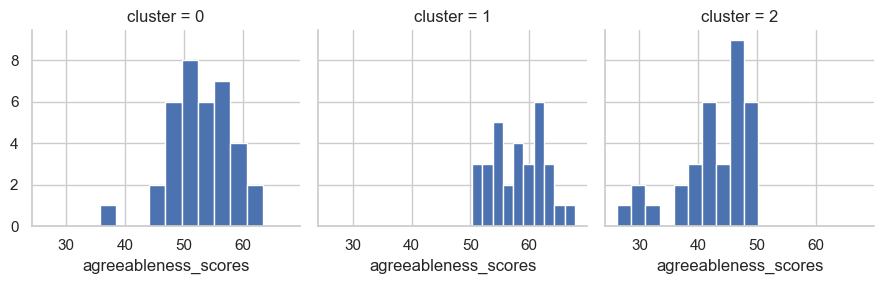

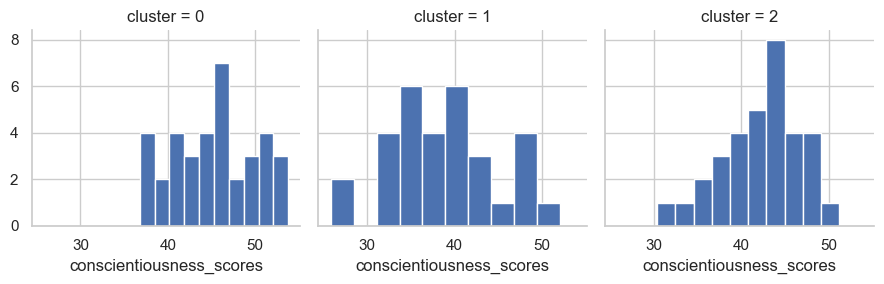

In [27]:
for c in df[numerical_cols]:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

<Figure size 640x480 with 0 Axes>

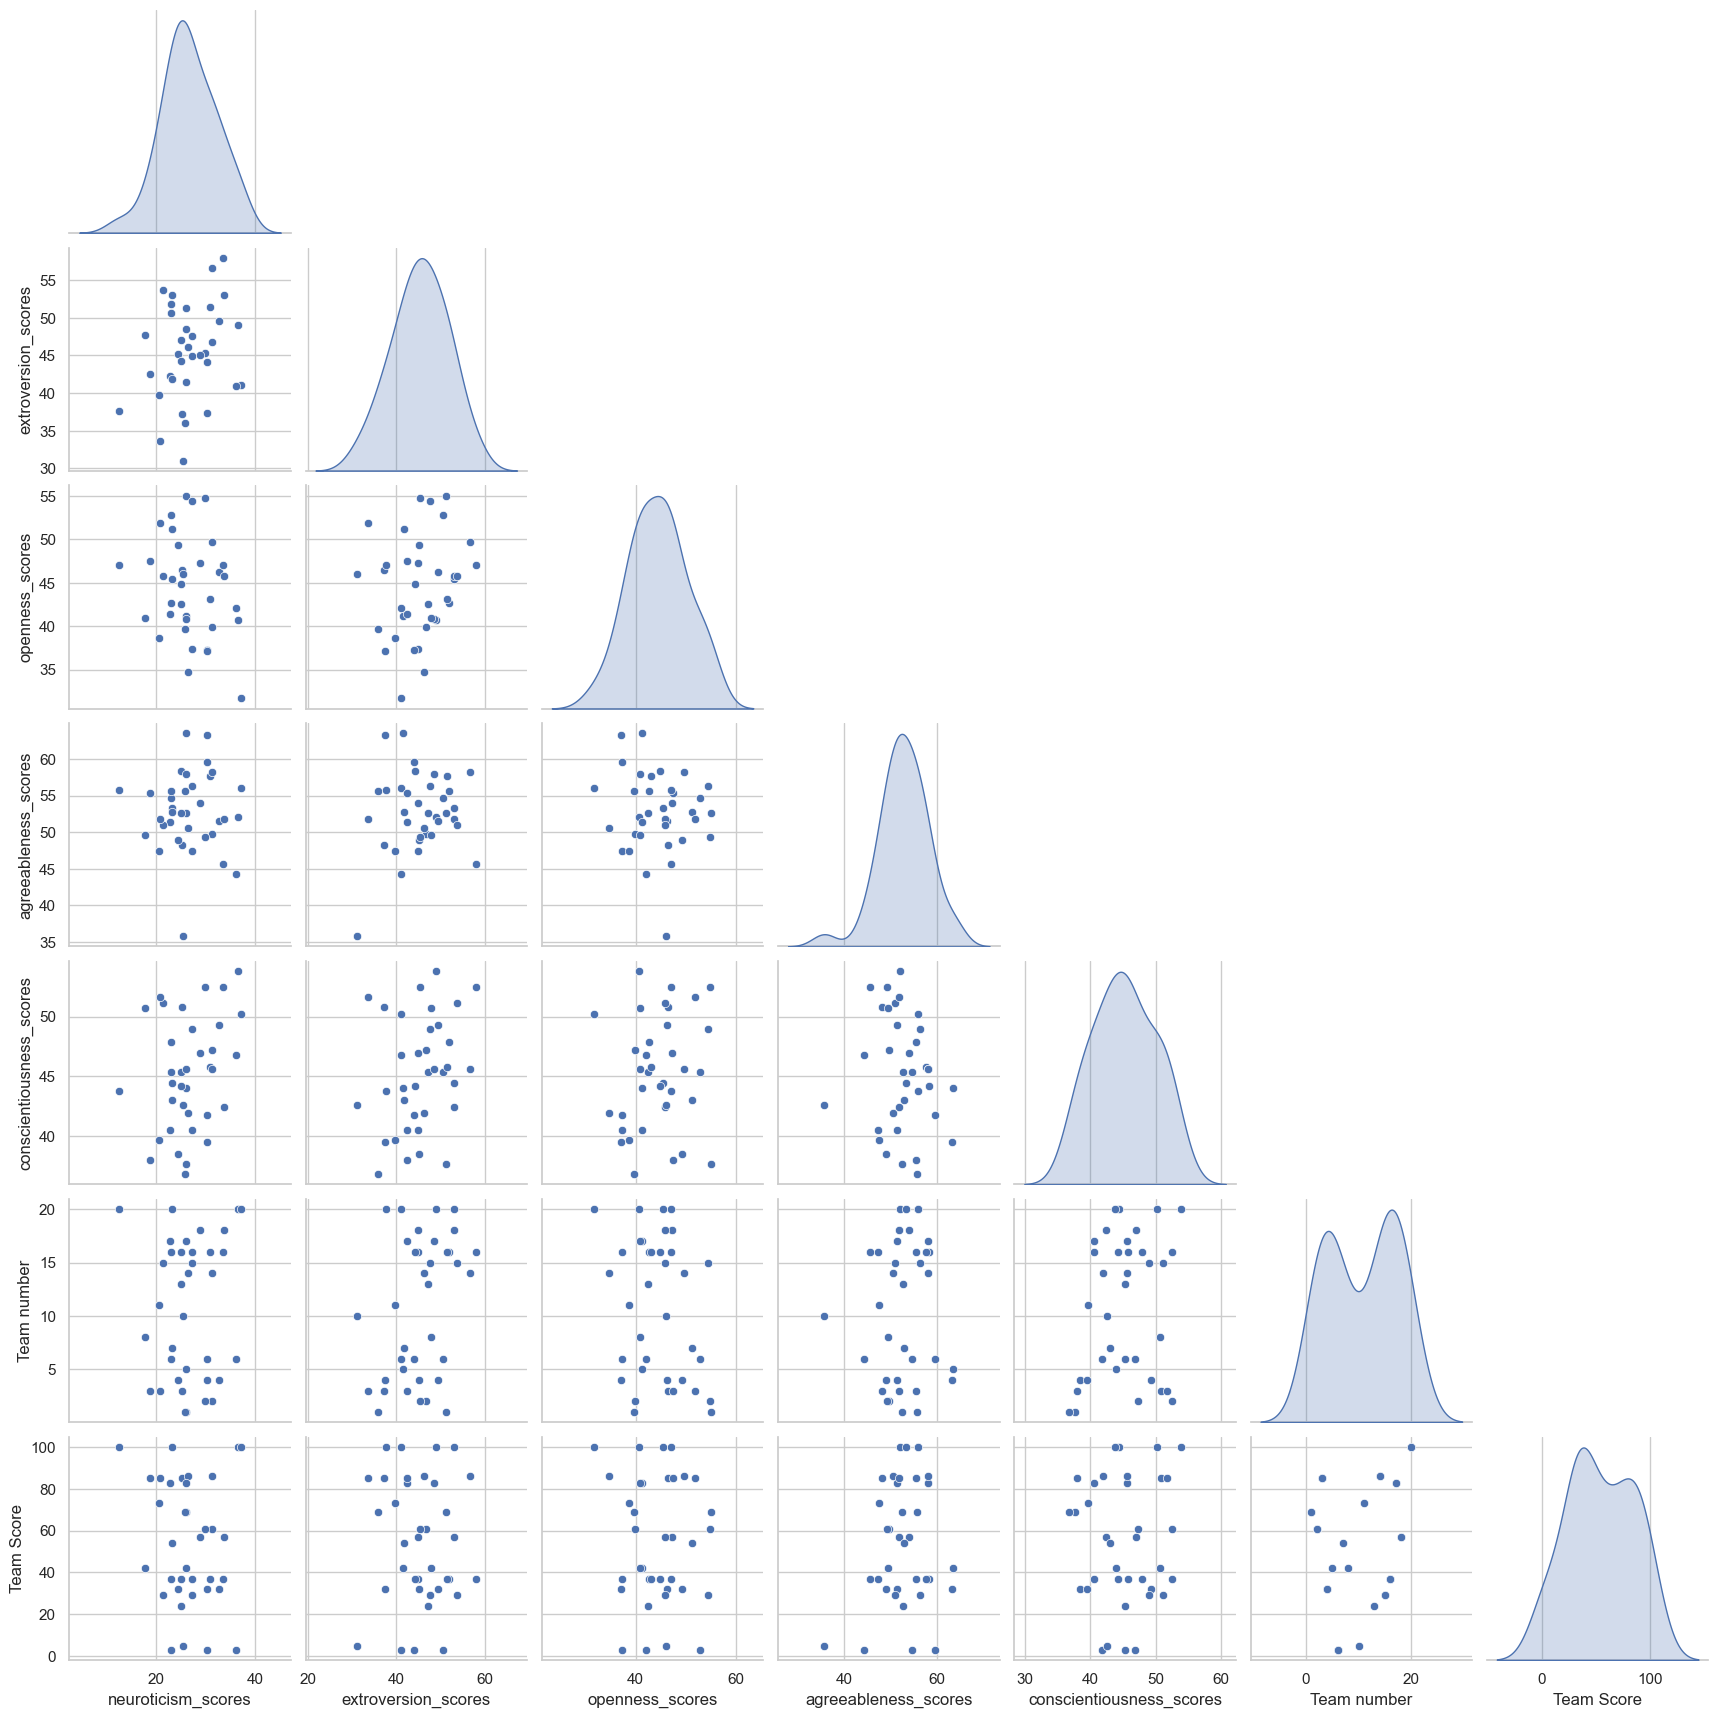

In [28]:
plt.figure()
sns.pairplot(vars=df.columns.drop('cluster'), 
             corner=True,diag_kind='kde',
             data=df[df['cluster']==0])
plt.show()

In [20]:
cluster0_data = df[df['cluster'] == 0]
cluster1_data = df[df['cluster'] == 1]
cluster2_data = df[df['cluster'] == 2]

In [21]:
cluster0_descriptive_stats = cluster0_data.describe()
cluster1_descriptive_stats = cluster1_data.describe()
cluster2_descriptive_stats = cluster2_data.describe()

# Print the descriptive statistics
print("Cluster 0 Descriptive Statistics:")
print(cluster0_descriptive_stats)
print("\nCluster 1 Descriptive Statistics:")
print(cluster1_descriptive_stats)
print("\nCluster 2 Descriptive Statistics:")
print(cluster2_descriptive_stats)

Cluster 0 Descriptive Statistics:
       neuroticism_scores  extroversion_scores  openness_scores   
count           33.000000            33.000000        33.000000  \
mean            18.867273            54.839697        44.215152   
std              5.934211             6.242584         7.047951   
min              7.700000            41.460000        30.080000   
25%             14.060000            49.880000        38.770000   
50%             19.470000            54.460000        44.580000   
75%             23.200000            59.510000        48.570000   
max             29.810000            66.660000        58.390000   

       agreeableness_scores  conscientiousness_scores  Team number   
count             33.000000                 33.000000    33.000000  \
mean              57.891212                 39.083030     9.484848   
std                4.639766                  6.266999     6.245605   
min               50.250000                 25.810000     1.000000   
25%         

In [29]:
cluster0_mean_std = cluster0_data.describe(include='all').loc[['mean', 'std']].round(2)
cluster1_mean_std = cluster1_data.describe(include='all').loc[['mean', 'std']].round(2)
cluster2_mean_std = cluster2_data.describe(include='all').loc[['mean', 'std']].round(2)

# Print the mean and standard deviation for each cluster
print("Cluster 0 Mean and Standard Deviation:")
print(cluster0_mean_std)
print("\nCluster 1 Mean and Standard Deviation:")
print(cluster1_mean_std)
print("\nCluster 2 Mean and Standard Deviation:")
print(cluster2_mean_std)

Cluster 0 Mean and Standard Deviation:
      neuroticism_scores  extroversion_scores  openness_scores   
mean               18.87                54.84            44.22  \
std                 5.93                 6.24             7.05   

      agreeableness_scores  conscientiousness_scores  Team number  Team Score   
mean                 57.89                     39.08         9.48       54.39  \
std                   4.64                      6.27         6.25       28.84   

      cluster  
mean      0.0  
std       0.0  

Cluster 1 Mean and Standard Deviation:
      neuroticism_scores  extroversion_scores  openness_scores   
mean               19.40                54.72            43.20  \
std                 6.18                 6.65             5.46   

      agreeableness_scores  conscientiousness_scores  Team number  Team Score   
mean                 42.65                     42.33         9.30       40.97  \
std                   6.11                      4.77         5.48    

In [23]:
summery = pd.DataFrame([
    {'neuroticism_scores': 26.62, 'extroversion_scores': 43.90, 'openness_scores': 43.79, 'agreeableness_scores': 52.87, 'conscientiousness_scores': 45.03,  'Team Score': 60.61, 'cluster': 0},
    {'neuroticism_scores': 19.86, 'extroversion_scores': 54.78, 'openness_scores': 43.39, 'agreeableness_scores': 42.97, 'conscientiousness_scores': 42.87, 'Team Score': 50.20, 'cluster': 1},
    {'neuroticism_scores': 19.23, 'extroversion_scores': 54.89, 'openness_scores': 44.38, 'agreeableness_scores': 57.90, 'conscientiousness_scores': 39.27, 'Team Score': 59.32, 'cluster': 2}
])


summery
## Focus in Opennness and agreeableness and conscientious only
# Go the highest one of the the 3 it is for cluster 2 in agreeplness he is claabrator 
# cluster 0 is Executor 
# cluster 1 is innovator 

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team Score,cluster
0,26.62,43.90,43.79,52.87,45.03,60.61,0
1,19.86,54.78,43.39,42.97,42.87,50.20,1
2,19.23,54.89,44.38,57.90,39.27,59.32,2


C:\Users\jaffe\AppData\Local\Temp\ipykernel_15480\1732619343.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=trait, data=df, ci=None, ax=axes[i])
C:\Users\jaffe\AppData\Local\Temp\ipykernel_15480\1732619343.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=trait, data=df, ci=None, ax=axes[i])
C:\Users\jaffe\AppData\Local\Temp\ipykernel_15480\1732619343.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=trait, data=df, ci=None, ax=axes[i])


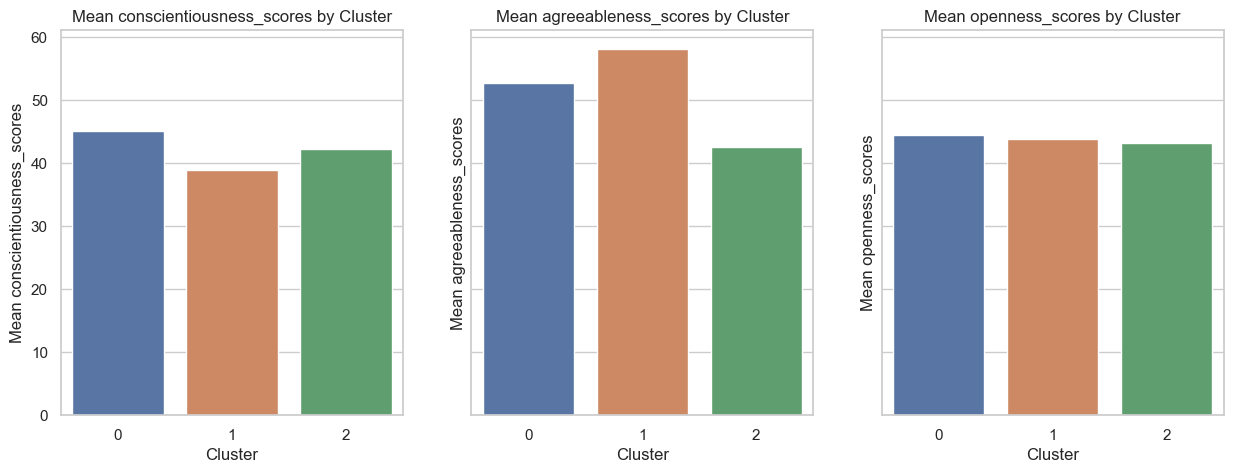

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Define the traits and clusters
traits = ['conscientiousness_scores', 'agreeableness_scores', 'openness_scores']
clusters = [0, 1, 2]

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(traits), figsize=(15, 5), sharey=True)

for i, trait in enumerate(traits):
    sns.barplot(x='cluster', y=trait, data=df, ci=None, ax=axes[i])
    axes[i].set_title(f'Mean {trait} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Mean {trait}')

plt.show()


In [ ]:
 

# cluster 1 is claabrator
# cluster 0 is Executor 

#cluster 2  is Innovator  

In [31]:
df

,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score,cluster
0,20.84,51.96,45.72,45.53,34.60,3,85,2
1,22.39,54.07,55.71,41.56,44.16,2,61,2
2,23.75,57.80,42.42,65.82,49.34,1,69,1
3,9.70,45.27,44.58,58.71,40.88,15,29,1
4,11.85,44.53,46.97,40.71,47.39,5,42,2
...,...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,14,86,1
96,24.53,55.03,45.86,50.61,31.78,6,3,1
97,31.30,56.55,49.66,58.17,45.59,14,86,0
98,20.70,39.71,38.69,47.48,39.68,11,73,0


In [32]:


# Replace 'df' with the actual name of your DataFrame
df['Role'] = df['cluster'].replace({0: 'Executor', 1: 'Collaborator', 2:'Innovator' })

df




,neuroticism_scores,extroversion_scores,openness_scores,agreeableness_scores,conscientiousness_scores,Team number,Team Score,cluster,Role
0,20.84,51.96,45.72,45.53,34.60,3,85,2,Innovator
1,22.39,54.07,55.71,41.56,44.16,2,61,2,Innovator
2,23.75,57.80,42.42,65.82,49.34,1,69,1,Collaborator
3,9.70,45.27,44.58,58.71,40.88,15,29,1,Collaborator
4,11.85,44.53,46.97,40.71,47.39,5,42,2,Innovator
...,...,...,...,...,...,...,...,...,...
95,13.79,41.46,38.77,59.79,41.17,14,86,1,Collaborator
96,24.53,55.03,45.86,50.61,31.78,6,3,1,Collaborator
97,31.30,56.55,49.66,58.17,45.59,14,86,0,Executor
98,20.70,39.71,38.69,47.48,39.68,11,73,0,Executor


In [33]:
# Assuming your DataFrame is named 'df_result'
df.to_excel('adjusted_results.xlsx', index=False)


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

Collaborator       0.89      0.89      0.89         9
    Executor       0.67      0.80      0.73         5
   Innovator       1.00      0.91      0.95        11

    accuracy                           0.88        25
   macro avg       0.85      0.87      0.86        25
weighted avg       0.89      0.88      0.88        25



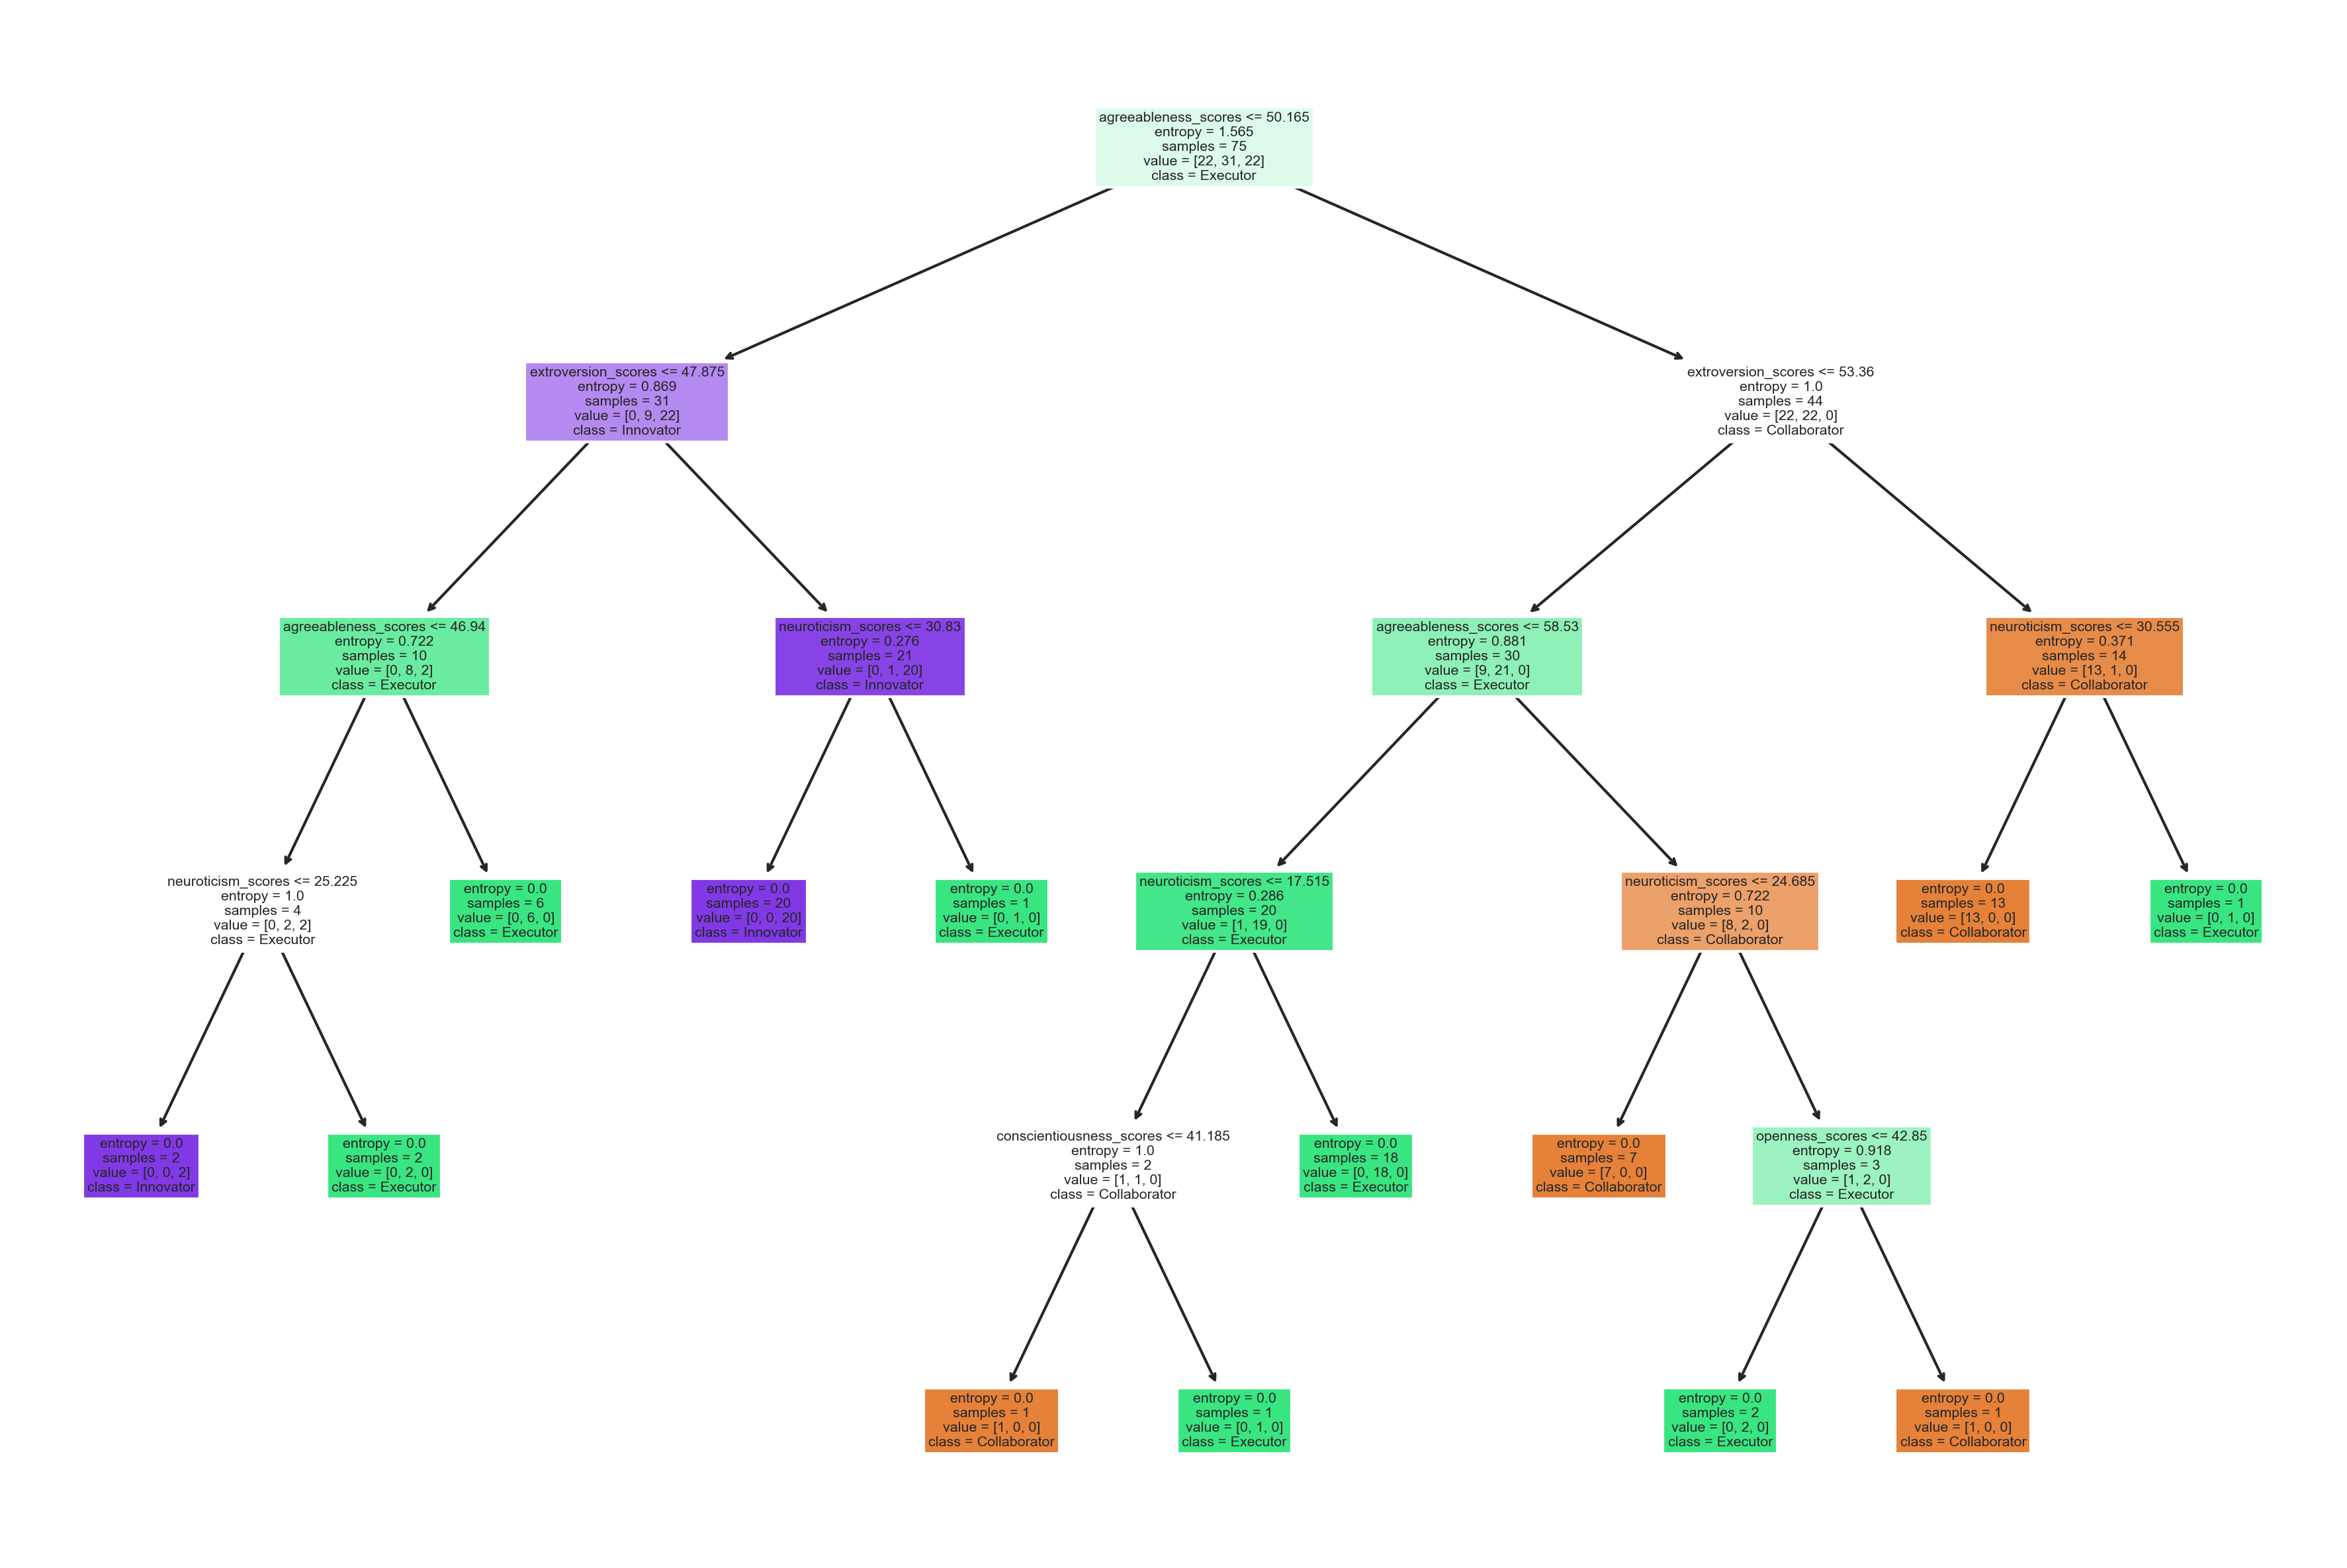

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming your features are in X and target variable (Role) is in y
X = df[['neuroticism_scores', 'extroversion_scores', 'openness_scores', 'agreeableness_scores', 'conscientiousness_scores']]
y = df['Role']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Initialize the Decision Tree Classifier (ID3)
dt_classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')  # 'entropy' for ID3

# Step 3: Train the model
dt_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

# Visualize the decision tree
# plt.figure(figsize=(12, 8))
# plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=dt_classifier.classes_)
# plt.show()
plt.figure(figsize=(15, 10), dpi=300)
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=dt_classifier.classes_)
plt.savefig('decision_tree.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

Collaborator       0.89      0.89      0.89         9
    Executor       0.67      0.80      0.73         5
   Innovator       1.00      0.91      0.95        11

    accuracy                           0.88        25
   macro avg       0.85      0.87      0.86        25
weighted avg       0.89      0.88      0.88        25

